# COMP24111 - Exercise 3: _Face recognition_

## 1. Task description

You will work on a face recognition task. The provided dataset includes face images of 40 subjects. There are a total of 400 images, with 10 images per subject. Each image contains 32×32=1024 pixels, with 256 grey levels per pixel.

## 2. Preparation

### Setting up

The functions that you need are defined in the source file we have provided you with. To use them you must import it first:

In [1]:
from lab3lib import load_data, show_single_face, show_faces, partition_data, split_left_right, join_left_right, show_split_faces
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax

ImportError: cannot import name 'softmax'

Now you can load the data:

In [2]:
data, labels = load_data()

### Visualising the dataset

You can observe the faces stored in a data matrix by using the functions `show_single_face()` and `show_faces()`.

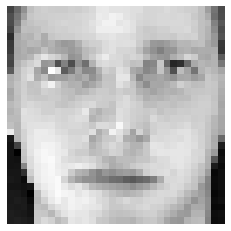

In [3]:
# Display a single example.
show_single_face(data[0, :])

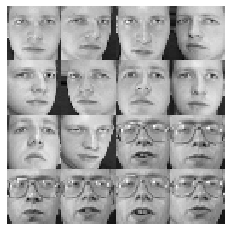

In [4]:
# Display the first 16 examples in a 4x4 grid.
show_faces(data[:16, :], num_per_row=4)

### Splitting into train and test set

A data partition function is supplied to facilitate your experiments. It randomly splits the provided data into the training and test sets, where the training set contains $N$ samples per class and the test set contains
the remaining samples. It takes the labels and the specified number $N$ as the input. It returns the sample indices in the training and test set. For example, the following code divides a given set of 400 samples into a training set containing 3 samples per subject and a test set containing 7 samples per subject:

In [5]:
tr_ind, te_ind = partition_data(labels, num_per_class=3)
tr_data = data[tr_ind, :]
tr_label = labels[tr_ind]
te_data = data[te_ind, :]
te_label = labels[te_ind]

## 3. $L_2$-regularised least squares implementation

Now, you will need to implement the function `l2_rls_train` below. It should train a linear model by minimising the $L_2$-regularised sum of squares loss using the normal equations (this is called $L_2$*-regularised least squares model*, or *ridge regression model*). It should support both single-output and multi-output cases. This function should take a set of training samples and a user-specified regularisation parameter $\lambda$ as the input, and return the predicted weights.

In [6]:
def l2_rls_train(tr_data, tr_labels, lambda1):  # Add any other arguments here
    """
    A summary of your function goes here.
    
    It takes 3 inputs tr_data, tr_labels, lambda1
    
    tr_data: it is a matrix which is of size k times 1024 where k are samples and 1024 pixels which are features
    
    tr_labels: this is a vector which has a size k where in exp1 it is the labels for the tr_data[i] and for exp2 it 
    is calculated by a method to specify if this x sample belongs to class z
    
    lambda1: Hyperparameter which is set by the user

    Returns: the weights which is a vector of size 1025.
    """
    
    # This is just to be consistent with the lecture notes.
    #set training data to X and training labels to y
    X, y = tr_data, tr_labels
    
    # Expand X with a column of ones.
    # we add a column of ones to the X to form X_tilde 
    X_tilde = np.c_[np.ones(X.shape[0]), X]
    # Compute the coefficient vector.
    # Check if lambda bigger than 0
    if lambda1 > 0: 
        #compute the equation in the notes in lecture slide 33 in Ch6.
        z = X.shape[1]
        Identity = np.identity(z + 1)
        firstpart = np.transpose(X_tilde) @ X_tilde
        secondpart = np.dot(lambda1, Identity)
        thirdpart = np.linalg.inv(firstpart + secondpart)
        fourthpart = np.transpose(X_tilde) @ y
        #get w
        w = thirdpart @ fourthpart
    else:
        #if lambda is 0 get pseudo inverse
         w = np.linalg.pinv(X_tilde) @ y
    
    # Return model parameters.
    return w

Once you have trained your model, you can use it on to predict new data. Implement the following function to do this.

In [7]:
def l2_rls_predict(w, data): # Add any other arguments here
                  
    """
    A summary of your function goes here.

    data: These are the features which is a matrix and got size of 1024 for z samples.
    
    w = the weights which is a vector of size 1025.
    
    Returns: predicted_Y which is the class prediction for each data.
    """
    
    # This is just to be consistent with the lecture notes.
    X = data
    # we add a column of ones to the X to form X_tilde 
    X_tilde = np.c_[np.ones(X.shape[0]), X]
    
    #calculate y predicted by multiplying X tilde and the weights
    predicted_Y = X_tilde @ w

    return predicted_Y

## 4. Experiments

Start to use your functions `l2_rls_train` and `l2_rls_predict` to perform the following experiments.

### Experiment 1: Binary Classification

Start with a binary classification task to classify face images for subjects “1” and “30”.

Train three classifiers:
1. Set $y=-1$ for samples from “1” and $y=+1$ for samples from “30” to train a linear model, and use the threshold $T= 0$ to obtain the class prediction.
2. Set $y=0$ for samples from “1” and $y=1$ for samples from “30” to train a linear model, and use the threshold $T= 0.5$ to obtain the class prediction.
2. Set $y=1$ for samples from “1” and $y=30$ for samples from “30” to train a linear model, and use the threshold $T= 15.5$ to obtain the class prediction.

Randomly select 3 images per subject for training, and use the remaining images for testing. Train your classifier 1 and test it with a fixed regularisation parameter $\lambda$=0. Repeat this process 50 times and record the training and test errors.

In [8]:
# exp1 takes two classes 1 and 30 and the threshold which is 0 for now
def exp1(label_class_1, label_class_30, threshold):
    # Map the labels and partition the data
    #arrays that will be used onwards
    tr_predicted_int = []
    te_predicted_int = []
    tr_labels_new = []
    te_labels_new = []
    
    #get labels of both 1 and 30 by concatenating labels of 2 classes
    tr_labels_1_30 = np.concatenate((labels[0: 10], labels[290: 300]))
    #get data of both 1 and 30 by concatenating labels of 2 classes
    tr_data_1_30 = np.concatenate((data[0: 10, : ], data[290: 300, : ]))
    
    # partition data to set 3 for training and 7 for testing per class
    tr_ind, te_ind = partition_data(tr_labels_1_30, num_per_class=3)
    
    #set training data and label for the ind partitioned
    tr_data = tr_data_1_30[tr_ind, :]
    tr_labels = tr_labels_1_30[tr_ind]
    #set testing data and label for the ind partitioned
    te_data = tr_data_1_30[te_ind, :]
    te_labels = tr_labels_1_30[te_ind]
    
    # use the new array and check if it is 1 then add class 1 otherwise add class 30 to make up the 
    #training labels
    for lb in tr_labels:
        if (lb == 1):
            tr_labels_new.append(label_class_1)
        else:
            tr_labels_new.append(label_class_30)
    
    # use the new array and check if it is 1 then add class 1 otherwise add class 30 to make up the 
    #testing labels
    for lb in te_labels:
        if (lb == 1):
            te_labels_new.append(label_class_1)
        else:
            te_labels_new.append(label_class_30)
    
    # Train your model
    w = l2_rls_train(tr_data, tr_labels_new, 0)
    
    # Define the threshold which is 0 at the moment
    T = threshold
    
    # Perform prediction for training and compute the training error
    tr_predicted = l2_rls_predict(w, tr_data)
    
    # if pr in the training prediction less than the threshold so it is class 1 otherwise it is class 30
    for pr in tr_predicted:
        if (pr <= T):
            tr_predicted_int.append(label_class_1)
        else:
            tr_predicted_int.append(label_class_30)
    #get the tr err percentage by checking if predicted == actual
    # if yes get the sum so now we are getting the accuracy then (1 -) will get the error
    tr_err = 1 - (np.sum(np.asarray(tr_predicted_int) == np.asarray(tr_labels_new)) / 6)
    
    # Perform prediction for testing and compute the test error
    te_predicted = l2_rls_predict(w, te_data)
    
    # if pr in the testing prediction less than the threshold so it is class 1 otherwise it is class 30
    for pr in te_predicted:
        if (pr <= T):
            te_predicted_int.append(label_class_1)
        else:
            te_predicted_int.append(label_class_30)
    #get the te err percentage by checking if predicted == actual
    # if yes get the sum so now we are getting the accuracy then (1 -) will get the error
    te_err = 1 - (np.sum(np.asarray(te_predicted_int) == np.asarray(te_labels_new)) / 14)
    
    return tr_err, te_err

In [9]:
# Use the `exp1()` function to experiment with classifier 1.
# Your code goes here.
# 2 arrays for training and testing
tr_err_arr_1 = []
te_err_arr_1 = []
#iterate 50 times
for i in range (50):
    #call the method and append the arrays by the return of exp1
    #class 1 is -1 and class 30 is 1 and threshold is 0
    tr_err, te_err = exp1(-1 , 1, 0)
    tr_err_arr_1.append(tr_err)
    te_err_arr_1.append(te_err)


Repeat the same experiment for classifier 2.

In [10]:
# Use the `exp1()` function to experiment with classifier 2.
# Your code goes here.
# 2 arrays for training and testing
tr_err_arr_2 = []
te_err_arr_2 = []
#iterate 50 times
for i in range (50):
    #call the method and append the arrays by the return of exp1
    #now class 1 is 0 and class 30 is 1 and threshold is 0.5
    tr_err, te_err = exp1(0 , 1, 0.5)
    tr_err_arr_2.append(tr_err)
    te_err_arr_2.append(te_err)



Repeat the same experiment for classifier 3.

In [11]:
# Use the `exp1()` function to experiment with classifier 3.
# Your code goes here.
# 2 arrays for training and testing
tr_err_arr_3 = []
te_err_arr_3 = []
#iterate 50 times
for i in range (50):
    #call the method and append the arrays by the return of exp1
    #now class 1 is 1 and class 30 is 30 and threshold is 15.5
    tr_err, te_err = exp1(1 , 30, 15.5)
    tr_err_arr_3.append(tr_err)
    te_err_arr_3.append(te_err)

Print the test error mean and standard deviation of the three classifiers and display them in the same plot.

Mean of testing errors for classifier 1:
0.05857142857142858
Standard deviation of testing errors for classifier 1:
0.08041981682878611
Mean of training errors for classifier 1:
0.0


Mean of testing errors for classifier 2:
0.11
Standard deviation of testing errors for classifier 2:
0.1117668856803923
Mean of training errors for classifier 2:
0.0


Mean of testing errors for classifier 3:
0.07857142857142857
Standard deviation of testing errors for classifier 3:
0.11271238455756787
Mean of training errors for classifier 3:
0.0




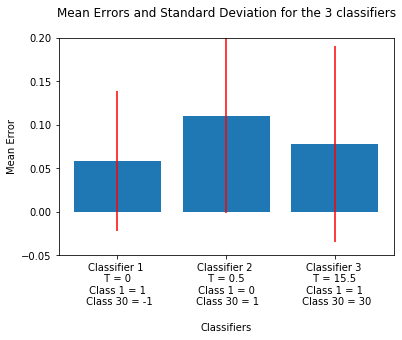

In [12]:
# Your code goes here
#get the mean of training and testing errors and the std for classifier 1
tr_err_arr_1_mean = np.mean(tr_err_arr_1)
te_err_arr_1_mean = np.mean(te_err_arr_1)
te_err_arr_1_std = np.std(te_err_arr_1)
print("Mean of testing errors for classifier 1:")
print(te_err_arr_1_mean)
print("Standard deviation of testing errors for classifier 1:")
print(te_err_arr_1_std)
print("Mean of training errors for classifier 1:")
print(tr_err_arr_1_mean)
print()
print()

#get the mean of training and testing errors and the std for classifier 2
tr_err_arr_2_mean = np.mean(tr_err_arr_2)
te_err_arr_2_mean = np.mean(te_err_arr_2)
te_err_arr_2_std = np.std(te_err_arr_2)
print("Mean of testing errors for classifier 2:")
print(te_err_arr_2_mean)
print("Standard deviation of testing errors for classifier 2:")
print(te_err_arr_2_std)
print("Mean of training errors for classifier 2:")
print(tr_err_arr_2_mean)
print()
print()

#get the mean of training and testing errors and the std for classifier 3
tr_err_arr_3_mean = np.mean(tr_err_arr_3)
te_err_arr_3_mean = np.mean(te_err_arr_3)
te_err_arr_3_std = np.std(te_err_arr_3)
print("Mean of testing errors for classifier 3:")
print(te_err_arr_3_mean)
print("Standard deviation of testing errors for classifier 3:")
print(te_err_arr_3_std)
print("Mean of training errors for classifier 3:")
print(tr_err_arr_3_mean)
print()
print()

#put all means into one array and std as well
all_testing_errors_mean = [te_err_arr_1_mean, te_err_arr_2_mean, te_err_arr_3_mean] 
all_testing_errors_std = [te_err_arr_1_std, te_err_arr_2_std, te_err_arr_3_std]
#set the title for the graph
plt.title("Mean Errors and Standard Deviation for the 3 classifiers\n")
# plot a bar for all the means and the std 
plt.bar(range(3), all_testing_errors_mean, yerr=all_testing_errors_std, ecolor='r')
# set the y axis label 
plt.ylabel("Mean Error")
# set the c axis label
plt.xlabel("\nClassifiers")
ind = np.arange(3)    
# set labels for each mean and std 
plt.xticks(ind, ('Classifier 1 \n T = 0 \n Class 1 = 1 \n Class 30 = -1', 'Classifier 2 \n T = 0.5 \n Class 1 = 0 \n Class 30 = 1', 'Classifier 3 \n T = 15.5 \n Class 1 = 1 \n Class 30 = 30'))
# appropriate axes is created
axes = plt.gca()
#set range of y axis
axes.set_ylim([-0.05,0.2])
plt.show()




Compare the three classifiers and comment on your results.

What training accuracies do you obtain with your linear classifier? Explain the reason.

Between subjects “1” and “30”, which one is more difficult for the linear classifier to recognise? Explain it.

### Experiment 2: Multi-class Classification

Now, proceed to the multi-class classification task to classify face images for all the 40 subjects. Decide an appropriate way to set your target output and make class prediction. 

Split your data to two sets: the training set contains 5 randomly selected images per subject and the test set contains the remaining images. The training set is used to train the model and select hyper-parameter $\lambda$, while the test set is only for final assessment of the trained classifier with the selected $\lambda$. 

Design an appropriate and complete machine learning experiment, which should include the training, hyper-parameter selection and evaluation stages. You can choose from the random subsampling, $k$-fold CV and LOO approaches for hyper-parameter selection. 

Write your code below and make sure it compiles. Show your code to the TA, explain your classifier and experiment design.

In [13]:
#this def selects the best lambda
def hyperparameter_selection(tr_data, tr_label, data_splits):
    """
    Finds the best value for lambda using random subsampling.
    """
    # Your code goes here
    # Here I set the hyperparameter range which is between -4 and 10 and iterate by 1
    hyperparameter_range = []
    for i in range(-6, 10, 1):
        hyperparameter_range.append(10**i)
    #get the indices we will use in the experiment
    # use 2 samples for training 
    # others for testing
    exp_ind = []
    for i in range(data_splits):
        exp_ind.append(list(partition_data(tr_label, num_per_class=2)))
    # lambda errors saved here which is the mean of the returned errors from the classifyAndError method
    hyperparameter_errors = []
    for lambdaa in hyperparameter_range:
        #each experiment error
        datasplits_errors = []
        #for each exp
        for i in range(data_splits):
            #set data and labels
            tr_data_split = tr_data[exp_ind[i][0], :]
            te_data_split = tr_data[exp_ind[i][1], :]
            te_label_split = tr_label[exp_ind[i][1]]
            #get err from the classify and append the exp err 
            err = classifyAndError(tr_data_split, te_data_split, lambdaa, -1, 1, 2, 3, te_label_split, 40)
            datasplits_errors.append(err)
        #set the mean of lambda error for each experiment
        hyperparameter_errors.append(np.mean(np.array(datasplits_errors)))
    # best lambda is the index with the lowest error 
    best_lambda = hyperparameter_errors.index(min(hyperparameter_errors))
    print("Lambda Errors: ", hyperparameter_errors)
    
    # get lambda by accessing the array using the index selected
    return hyperparameter_range[best_lambda]

#soft max function which returns the probability of this being the class predicted
def softMax(w, X, class_to_predict):
    # X_new is X tilde 
    # append X with a column of ones
    X_new = np.append(np.array([1]), X)
    # Y is transpose w multiply by X tilde
    #Y = np.transpose(w) @ X_new
    exp = np.exp(np.transpose(w) @ X_new)
    # numerator of the soft max function
    numerator_exp2 = exp[class_to_predict - 1]
    # denominator of the soft max function which is the sum of exp
    denominator_exp2 = np.sum(exp)
    softmax1 = numerator_exp2 / denominator_exp2
    return softmax1

#getTrainingLabels returns the training labels by specifying 
def getTrainingLabels(class1, class2, num_per_class, numberOfClasses):
    # an array for saving training label
    tr_label = []
    # for each class and for each number of training per class set the array 
    for z in range(numberOfClasses):
        for j in range(num_per_class):
            array = [class1 for k in range(numberOfClasses)]
            array[z] = class2
            tr_label.append(array)
    # change it to a numpy array 
    tr_label_array = np.array(tr_label)
    return tr_label_array
            
            
def classifyAndError(tr_data_exp2, te_data_exp2, lambda1, a, b, num_per_class_tr, num_per_class_te, expected_output, numberOfClasses):
    te_data = te_data_exp2
    # get tr_labels by calling the method which set the training labels
    tr_labels = getTrainingLabels(a, b, num_per_class_tr, 40)
    # set data to X as specified in notes
    X = tr_data_exp2
    #train using data and labels 
    w = l2_rls_train(X, tr_labels, lambda1)
    # predict using w and data
    predictedY = l2_rls_predict(w, te_data)
    # output of data labels 
    lb_out = []
    # m is 200 which is 40 * 5
    m = 40 * num_per_class_te
    for j in range(m):
        #save prob here 
        probOfSoftMax = []
        # for each class get probability being this class using soft max 
        for i in range(numberOfClasses):
            probOfSoftMax.append(softMax(w, te_data[j,:], i+1))
        # max prob is the maximum of array 
        maximumprob = max(probOfSoftMax)
        classGot = probOfSoftMax.index(maximumprob) + 1
        # add class to output labels 
        lb_out.append(classGot)
    # get predicted output by changing labels into an array 
    predicted_output = np.array(lb_out)
    # if not equal then it is an error so get their sum and divide by 200 to get percentage
    err = (predicted_output != expected_output).sum()
    return err / 200
    


In [14]:
# Your code goes here
#partition data to be 5 for testing and 5 for training per class
tr_ind_exp2, te_ind_exp2 = partition_data(labels, num_per_class=5)
# get the labels and data 
# we will get te label using a different method
tr_label_exp2 = labels[tr_ind_exp2]
tr_data_exp2 = data[tr_ind_exp2, :]
te_data_exp2 = data[te_ind_exp2, :]
te_label_exp2 = labels[te_ind_exp2]

# get the best lambda by giving the training data, labels  and the numebr of splits to be doing
lambda_best = hyperparameter_selection(tr_data_exp2, tr_label_exp2, 4)
print("Best Lambda: ", lambda_best)
# get the error using method classify 
exp2err = (classifyAndError(tr_data_exp2, te_data_exp2, lambda_best, -1, 1, 5, 5, te_label_exp2, 40))
print("Experiment 2 error: ", exp2err)

Lambda Errors:  [0.12875, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.1275, 0.12, 0.12625, 0.1775, 0.31375, 0.5712499999999999]
Best Lambda:  100000
Experiment 2 error:  0.045


Analyse the classification results, and pick some subjects that are considered the most difficult to recognise by your classifier. Show and explain it to the TA.

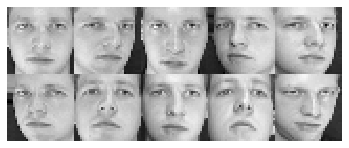

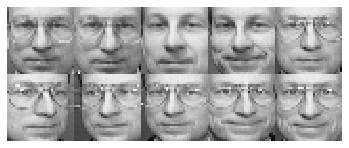

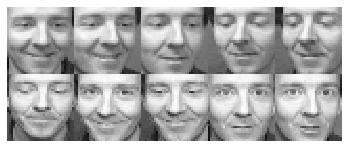

In [15]:
show_faces(data[0:10, :], num_per_row=5)
show_faces(data[120:130, :], num_per_row=5)
show_faces(data[20:30, :], num_per_row=5)


### Experiment 3: Face Completion

Revise the “Regression Example II” on face completion in Chapter 2. The task is to guess the 512 pixels of the right face from the 512 pixels of the left face. 

The following command can be used to extract the left and right faces from the input data.

In [16]:
left, right = split_left_right(data)

And you can visualise them with the function `show_split_faces()`:

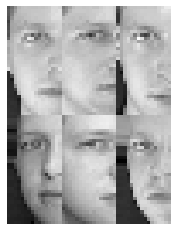

In [17]:
show_split_faces(left[:6, :], num_per_row=3)

Build a face completion model using your functions `l2_rls_train` and `l2_rls_predict`. Design an experiment to assess your model, which should include appropriate training and testing. Use mean absolute percentage error to evaluate the regression performance. You do not need to bother with hyper-parameter selection, but simply set $\lambda$=0.

Write your code below and make sure it compiles. Show your code to the TA, explain your model and experiment design, and demonstrate results.

In [18]:
# Your code goes here

#set the indices to be 5 for testing and 5 for training per class
tr_ind_exp3, te_ind_exp3 = partition_data(labels, num_per_class=5)
#set training and testing data
tr_data_exp3 = data[tr_ind_exp3, :]
te_data_exp3 = data[te_ind_exp3, :]

#split faces into left and right for training
tr_left_exp3, tr_right_exp3 = split_left_right(tr_data_exp3)
#split faces into left and right for testing
te_left, te_right = split_left_right(te_data_exp3)

# train and get the weight with threshold 0
w = l2_rls_train(tr_left_exp3, tr_right_exp3, 0)

# predict right for both training and testing using left
tr_predicted_exp3 = l2_rls_predict(w, tr_left_exp3)
te_predicted_exp3 = l2_rls_predict(w, te_left)

# calculate the mean absolute percentage error equation for testing in lect 3 slide 22
sum_exp3_test = 0
# for each sample, for each pixel in the half photo (512)
for i in range(200):
    for j in range(512):
        #calculate numerator of function
        numerator_exp3_test = abs(te_right[i, j] - te_predicted_exp3[i, j])
        #calculate denominator of function
        denominator_exp3_test = abs(te_right[i, j])
        #calculate the sum for each i and j
        sum_exp3_test += (numerator_exp3_test / denominator_exp3_test)

firstpart_test = 1 / (200 * 512) 
# mape fully implemented now
mape_test =  firstpart_test * sum_exp3_test
print("Mean Absolute Percentage Error For Testing = " + str(mape_test))

# calculate the mean absolute percentage error equation for training
sum_exp3_training = 0
for i in range(200):
    for j in range(512):
        #calculate numerator of function
        numerator_exp3_training = abs(tr_right_exp3[i, j] - tr_predicted_exp3[i, j])
        #calculate denominator of function
        denominator_exp3_training = abs(tr_right_exp3[i, j])
        #calculate the sum for each i and j
        sum_exp3_training += (numerator_exp3_training / denominator_exp3_training)

firstpart_train = 1 / (200 * 512) 
# mape fully implemented now
mape_train =  firstpart_train * sum_exp3_training
print("Mean Absolute Percentage Error For Training = " + str(mape_train))

Mean Absolute Percentage Error For Testing = 0.23078498522045796
Mean Absolute Percentage Error For Training = 3.663421310078232e-15


Visualise and compare the ground truth face (include both the left and right parts) and the completed face (include both the true left and predicted right parts) for 3 randomly chosen testing samples below. You can use `join_left_right(left, right)` to concatenate the left and right halves of a set of faces.

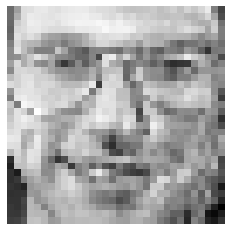

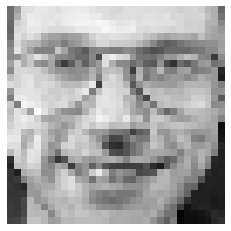

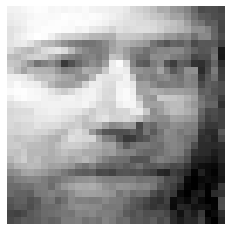

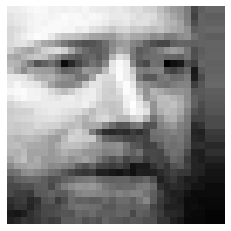

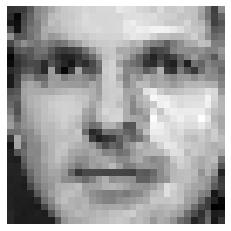

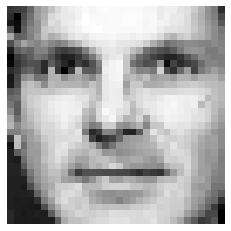

In [19]:
# Your code goes here
#randomly choose 3 from the 200 samples using np.random.choice
randomChoice = np.random.choice(np.array(range(200)), size=3, replace=False)
# join both faces for predicted and true faces
joined_predicted = join_left_right(te_left, te_predicted_exp3)
joined_true = join_left_right(te_left, te_right)
#for each one in the 3 persons
for i in range(3):
    #print predicted face and actual face 
    show_single_face(joined_predicted[randomChoice[i], :])
    show_single_face(joined_true[randomChoice[i], :])


Does your model work well? Comment on it.

## 5. Deliverables and Marking

By the deadline, you should submit one single Jupyter file using GitLab. Please find the coursework submission instruction from the following link: https://wiki.cs.manchester.ac.uk/index.php/UGHandbook19:Coursework .

This exercise is worth 15 marks – marks will be allocated roughly on the basis of: 
- rigorous experimentation,
- knowledge displayed when talking to the TA,
- problem solving skill,
- self-learning ability,
- how informative and well presented your graphs are,
- language and ease of reading.

You must be able to explain any code you've written in order to get full marks. During the marking session we will ask you to run all cells in your Jupyter file, so ensure that the file is runnable using the "Restart Kernel and Run All Cells" menu option.

The lab is marked out of 15:

|                          |         |
|:------------------------ |--------:|
| $L_2$-RLS Implementation | 3 marks |
| Experiment 1             | 4 marks |
| Experiment 2             | 4 marks |
| Experiment 3             | 4 marks |